In [ ]:
!pip install langgraph langchain-community langchain-openai tavily-python "httpx==0.27.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.7/409.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.0
    Uninstalling httpx-0.28.0:
      Successfully uninstalled httpx-0.28.0
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.21
    Uninstalling langchain-core-0.3.21:
      Successfully uninstalled langchain-core-0.3.21
  Attempting uninstall: langchain
  

In [ ]:
import os
# TAVILY와 OpenAI API 키를 환경 변수로 설정
os.environ["TAVILY_API_KEY"] = "tvly"
os.environ["OPENAI_API_KEY"] = "sk"

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tools = [TavilySearchResults(max_results=3)] # 검색 결과의 최대 개수를 3개로 설정

In [ ]:
from langchain import hub
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent # 랭그래프에서 제공하는 함수로, ReAct(Reasoning + Acting) 에이전트를 생성

llm = ChatOpenAI(model="gpt-4o") # LLM 초기화
agent_executor = create_react_agent(llm, tools) # ReAct 에이전트 생성

In [ ]:
agent_executor.invoke({"messages": [("user", "날씨와 아이스크림 판매량 관계는?")]}) # 에이전트 실행

{'messages': [HumanMessage(content='날씨와 아이스크림 판매량 관계는?', additional_kwargs={}, response_metadata={}, id='ec0fd444-99d1-49fb-bb62-0009b15e3088'),
  AIMessage(content='날씨와 아이스크림 판매량 사이에는 밀접한 관계가 있습니다. 일반적으로 다음과 같은 경향이 관찰됩니다:\n\n1. **기온 상승**: 날씨가 따뜻하거나 더울수록 아이스크림 판매량이 증가하는 경향이 있습니다. 더운 날씨에는 시원한 음식을 찾는 사람들이 많아지기 때문입니다.\n\n2. **햇빛과 일조량**: 햇볕이 잘 드는 맑은 날씨일수록 사람들이 야외 활동을 많이 하게 되고, 그 결과 아이스크림을 구매할 확률이 높아집니다.\n\n3. **습도**: 높은 습도는 체감 온도를 올려 더위를 더 느끼게 할 수 있으며, 이는 아이스크림과 같은 시원한 간식을 찾게 만드는 요소가 될 수 있습니다.\n\n4. **계절**: 여름철에는 전반적으로 아이스크림 판매량이 가장 높습니다. 반면, 겨울철에는 판매량이 감소하는 경향이 있습니다.\n\n이러한 관찰은 일반적인 경향을 나타내며, 특정 지역이나 상황에 따라 다를 수 있습니다. 마케팅이나 판매 전략 수립 시 이러한 날씨 요인을 고려하여 계획을 세우는 것이 중요합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 273, 'prompt_tokens': 90, 'total_tokens': 363, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 

In [ ]:
import operator # 함수형 프로그래밍을 지원하기 위한 모듈
from typing import Annotated, List, Tuple
from typing_extensions import TypedDict

class PlanExecute(TypedDict): # 데이터 구조 정의
    input: str # 사용자 입력 데이터
    plan: List[str] # 작업을 수행하기 위한 단계별 계획
    past_steps: Annotated[List[Tuple], operator.add] # 과거에 수행된 작업(단계)의 기록
    response: str # 최종 결과나 응답 데이터

In [ ]:
from pydantic import BaseModel, Field
# pydantic: 데이터를 구조화하고 유효성을 검사하는 라이브러리
# BaseModel: 데이터 모델을 정의하고, 데이터의 유효성을 검사하는 데 사용
# Field: 모델의 각 필드(속성)에 대해 추가적인 설명, 기본값, 제약 조건 등을 설정

class Plan(BaseModel):
    steps: List[str] = Field(
        description="따라야 할 다양한 단계를 정렬된 순서로 작성하세요"
    ) # 계획을 구성하는 여러 단계의 필드 정의

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

first_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """주어진 목표를 위해 간단한 단계별 계획을 세우세요. \
이 계획은 정확한 답을 도출할 수 있는 단계별 작업을 포함해야 합니다. \
마지막 단계의 결과는 최종 답이 되어야 합니다. 각 단계에 필요한 모든 정보가 포함되어야 합니다.\
답변은 한글로 알려주세요""",
        ),
        ("placeholder", "{messages}"),
    ]
) # 대화형 프롬프트 템플릿 생성

first_planner = first_prompt | ChatOpenAI(
    model="gpt-4o", temperature=0
).with_structured_output(Plan) # first_prompt(프롬프트 템플릿)과 GPT4o 모델을 결합하여 프롬프트를 기반으로 응답을 생성

In [ ]:
first_planner.invoke(
    {
        "messages": [
            ("user", "단백질이 다이어트에 미치는 효과는?")
        ]
    }
)

Plan(steps=['단백질의 기본적인 역할과 기능을 이해한다.', '단백질이 체중 감량에 어떻게 기여하는지 조사한다.', '단백질이 포만감에 미치는 영향을 연구한다.', '단백질 섭취가 근육량 유지에 어떻게 도움을 주는지 분석한다.', '단백질이 신진대사에 미치는 영향을 검토한다.', '단백질 섭취의 적정량과 과다 섭취의 부작용을 조사한다.', '단백질이 다이어트에 미치는 전반적인 효과를 종합하여 결론을 내린다.'])

In [ ]:
from typing import Union # 타입 힌트를 정의할 때 사용

class Response(BaseModel): # 데이터 모델 정의
    """사용자에게 응답하세요"""
    response: str # 사용자에게 전달할 최종 응답(문자열)

class Act(BaseModel):
    """수행할 작업"""

    action: Union[Response, Plan] = Field(
        description="사용자에게 응답하려면, 'Response'을 사용하세요."
        "답을 얻기 위해 도구를 추가로 사용해야 한다면, 'Plan'을 사용하세요."
    ) # 재 작업 상태를 나타내며, 사용자 응답 또는 새로운 계획 중 하나를 선택.

edited_prompt = ChatPromptTemplate.from_template(
    """주어진 목표를 위해 간단한 단계별 계획을 세우세요.\
이 계획은 정확한 답을 도출할 수 있는 개별 작업이 포함되어야 합니다. \
마지막 단계의 결과는 최종 답이어야 합니다. 각 단계에 필요한 모든 정보가 포함하도록 하세요..

당신의 목표는 이것입니다:
{input}

당신의 계획은 이것입니다:
{plan}

당신은 현재 다음의 단계를 완료했습니다:
{past_steps}

계획을 업데이트하세요. 더 이상 필요한 단계가 없고 사용자에게 응답할 수 있다면, 바로 응답하고. 그렇지 않다면, 계획을 재작성하세요. """
) # 프롬프트 템플릿 정의

edited_planner = edited_prompt | ChatOpenAI(
    model="gpt-4o", temperature=0
).with_structured_output(Act) # 에이전트 생성하되 모델의 출력 결과를 Act 데이터 모델의 형식에 맞게 반환

In [ ]:
from typing import Literal # 특정 값 집합으로 타입을 제한하는 타입 힌트
from langgraph.graph import END # 랭그래프에서 워크플로우 종료를 나타내는 상수

async def execute_step(state: PlanExecute): # 계획의 첫 번째 단계를 실행하고 결과를 저장하는 함수 정의
    plan = state["plan"]
    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    task = plan[0]
    task_formatted = f"""다음 계획에 대해:
{plan_str}\n\n당신은 단계를 실행하는 임무를 맡았습니다. {1}, {task}."""
    agent_response = await agent_executor.ainvoke(
        {"messages": [("user", task_formatted)]}
    )
    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
    }


async def first_plan_step(state: PlanExecute): # 사용자 입력에 기반하여 새로운 단계별 계획을 생성하는 함수 정의
    plan = await first_planner.ainvoke({"messages": [("user", state["input"])]})
    return {"plan": plan.steps}


async def edited_plan_step(state: PlanExecute): # 현재 상태를 기반으로 계획을 업데이트하거나 응답 생성하는 함수 정의
    output = await edited_planner.ainvoke(state)
    if isinstance(output.action, Response):
        return {"response": output.action.response}
    else:
        return {"plan": output.action.steps}


def should_end(state: PlanExecute): # 워크플로우 종료 여부를 결정하는 함수 정의
    if "response" in state and state["response"]:
        return END
    else:
        return "agent"

In [ ]:
from langgraph.graph import StateGraph, START # START는 워크플로우의 시작 상태를 나타내는 상수입니다

workflow = StateGraph(PlanExecute) # 워크플로우 정의

workflow.add_node("planner", first_plan_step) # 노드 추가, plan_step 함수를 실행하여 사용자 입력을 기반으로 계획 생성
workflow.add_node("agent", execute_step) # 노드 추가, execute_step 함수를 실행하여 계획의 단계를 실행하고 결과 기록
workflow.add_node("replan", edited_plan_step) # 노드 추가, replan_step 함수를 실행하여 계획을 업데이트하거나 응답 생성.
workflow.add_edge(START, "planner") # 워크플로우가 시작되면 "planner" 노드로 이동하여 계획 생성
workflow.add_edge("planner", "agent") # 계획 생성 후, "agent" 노드로 이동하여 첫 번째 단계를 실행
workflow.add_edge("agent", "replan") # 단계를 실행한 후, "replan" 노드로 이동하여 계획 업데이트 또는 응답 생성

workflow.add_conditional_edges(
    "replan",
    should_end,
    ["agent", END],
) # "replan" 노드에서 조건에 따라 다음 상태를 결정

graph = workflow.compile() # 정의된 워크플로우를 실행 가능한 형태로 변환

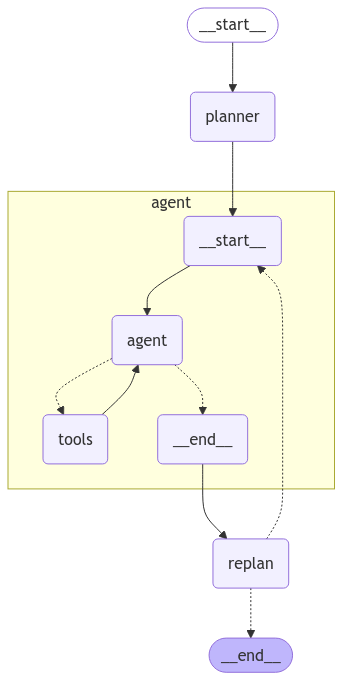

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png())) # 워크플로우 가시화

In [ ]:
config = {"recursion_limit": 10} # 최대 10번의 워크플로우의 재귀 호출 허용
inputs = {"input": "일본 온천 여행하기 좋은 계절은?"}
async for event in graph.astream(inputs, config=config): # 워크플로우를 비동기적으로 실행
    for k, v in event.items(): # 워크플로우의 현재 상태("planner", "agent", "replan") 및 결과를 나타내는 딕셔너리
        if k != "__end__": # 상태가 "__end__"이 아닐 경우, 출력 데이터를 콘솔에 출력
            print(v)

{'plan': ['일본의 계절별 기후를 조사한다.', '온천 여행에 적합한 기후 조건을 정의한다.', '각 계절의 기후가 온천 여행에 적합한지 평가한다.', '가장 적합한 계절을 선택한다.']}
{'past_steps': [('일본의 계절별 기후를 조사한다.', '일본의 계절별 기후에 대한 개요는 다음과 같습니다:\n\n1. **북부 일본:** 여름에는 따뜻하고 겨울에는 매우 추우며, 일본해 쪽과 산악 지역에는 많은 눈이 내립니다.\n\n2. **동부 일본:** 여름은 덥고 습하며, 겨울에는 매우 춥고 일본해 쪽과 산악 지역에 많은 눈이 내립니다.\n\n3. **서부 일본:** 여름은 매우 덥고 습하며, 겨울은 비교적 온화합니다.\n\n4. **남부 일본 및 오키나와:** 거의 열대 기후로, 겨울에 평균 기온이 17.5°C입니다. 이 지역은 여름에 덥고 습하며, 겨울은 비교적 온화합니다.\n\n5. **강수량:** 여름에 최대 강수량을 기록하며, 일본해 쪽에서는 늦가을과 초겨울에 강수량이 많습니다. 연간 강수량은 1,000mm에서 2,500mm로 다양하며, 가장 습한 지역에서는 4,000mm에서 10,000mm까지 기록됩니다.\n\n이 정보는 일본의 다양한 기후 지역을 이해하는 데 도움이 됩니다. 이제 온천 여행에 적합한 기후 조건을 정의하는 다음 단계로 넘어가겠습니다.')]}
{'plan': ['온천 여행에 적합한 기후 조건을 정의한다.', '각 계절의 기후가 온천 여행에 적합한지 평가한다.', '가장 적합한 계절을 선택한다.']}
{'past_steps': [('온천 여행에 적합한 기후 조건을 정의한다.', '온천 여행에 적합한 기후 조건을 정의하기 위해 고려할 요소는 다음과 같습니다:\n\n1. **쾌적한 외부 기온**: 너무 덥거나 추운 날씨는 온천을 즐기기에 불편할 수 있습니다. 일반적으로 외부 기온이 10°C에서 25°C 사이인 날씨가 가장 이상적입니다.\n\n2. **습도**: 높은 습도는 불쾌감을 줄 수 있습니다. 적당한 습도가 온천을 즐기기에